# R0 Analysis of COVID-19
22 March 2020

Cecilia García López de Munain

## Libraries

In [437]:
import pandas as pd
import numpy as np
import os, sys
import matplotlib.pyplot as plt
import pickle
from datetime import timedelta
import datetime

## Parameters

In [438]:
sys.path.append('./')

In [439]:
PATH_ROOT_INPUT_DATA = 'data\\input'
PATH_ROOT_INTERIM_DATA = 'data\\interim'
INTERIM_DATA_NAME_COVID = 'covid_19_data_cum.pkl'
INTERIM_DATA_NAME_COVID1 = "data_V2_for_change_in_exponential_growth.pkl"
INTERIM_DATA_NAME_GOVM = 'government_measures.csv'

# Pre-Analisis

In [440]:
covid19_data_for_concat = pickle.load(open(os.path.join(PATH_ROOT_INTERIM_DATA,INTERIM_DATA_NAME_COVID1), "rb" ))

In [441]:
covid19_data_for_concat.index = pd.to_datetime(covid19_data_for_concat.index)

In [442]:
covid19_data_for_concat[covid19_data_for_concat.CountryExp == "China"].head()

,CountryExp,NewConfCases_cum,NewDeaths_cum,NewRecovered_cum,NewConfCases,NewDeaths,NewRecovered,activos
DateRep,,,,,,,,
2020-01-22,China,547.0,17.0,28.0,547.0,17.0,28.0,502.0
2020-01-23,China,639.0,18.0,30.0,92.0,1.0,2.0,591.0
2020-01-24,China,916.0,26.0,36.0,277.0,8.0,6.0,854.0
2020-01-25,China,1399.0,42.0,39.0,483.0,16.0,3.0,1318.0
2020-01-26,China,2062.0,56.0,49.0,663.0,14.0,10.0,1957.0


## Import Data

COVID Data

In [443]:
covid19_data = pickle.load(open(os.path.join(PATH_ROOT_INTERIM_DATA,INTERIM_DATA_NAME_COVID1), "rb" ))

In [444]:
covid19_data.head()

,CountryExp,NewConfCases_cum,NewDeaths_cum,NewRecovered_cum,NewConfCases,NewDeaths,NewRecovered,activos
DateRep,,,,,,,,
2020-02-28,Azerbaijan,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2020-02-25,Afghanistan,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2020-02-26,Afghanistan,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2020-02-27,Afghanistan,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [445]:
# Not studying conveyance Japan so dropping it 
covid19_data = covid19_data.loc[covid19_data['CountryExp'] != 'Cases on an international conveyance Japan',:]

In [446]:
list(covid19_data['CountryExp'].sort_values().unique())

[' Azerbaijan',
 'Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahamas, The',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Channel Islands',
 'Chile',
 'China',
 'Colombia',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cruise Ship',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Czechia',
 'Denmark',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'East Timor',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Faroe Islands'

Government Measures Data

In [447]:
gov_measures = pd.read_csv(os.path.join(PATH_ROOT_INPUT_DATA, INTERIM_DATA_NAME_GOVM))

In [448]:
gov_measures.head()

,CountryExp,Government Measure,DaysFromFirst
0,Spain,Alerta Epidemiológica,6
1,Spain,Supervisión de ingreso de pasajeros,36
2,Spain,Cierre de escuelas,41
3,Spain,Licencias y home office,41
4,Spain,Cierre de espectáculos,42


In [449]:
gov_measures.CountryExp.unique()

array(['Spain', 'Italy', 'France', 'China'], dtype=object)

In [450]:
gov_measures.CountryExp.unique()

array(['Spain', 'Italy', 'France', 'China'], dtype=object)

# Indicator

In [451]:
covid19_data = covid19_data[covid19_data["NewConfCases_cum"]>0]

In [452]:
covid19_data.head()

,CountryExp,NewConfCases_cum,NewDeaths_cum,NewRecovered_cum,NewConfCases,NewDeaths,NewRecovered,activos
DateRep,,,,,,,,
2020-02-28,Azerbaijan,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2020-02-25,Afghanistan,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2020-02-26,Afghanistan,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2020-02-27,Afghanistan,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [532]:
covid19_data["Infected_per_day"] = covid19_data["NewConfCases"]/covid19_data["activos"]
covid19_data["Infected_per_day"] = covid19_data["Infected_per_day"].fillna(0)

In [533]:
covid19_data.head()

,index,DateRep,CountryExp,NewConfCases_cum,NewDeaths_cum,NewRecovered_cum,NewConfCases,NewDeaths,NewRecovered,activos,Infected_per_day,Growth3Days,previous_growth_3d,forward_growth_3d
0,0,2020-01-22,Thailand,2.0,0.0,0.0,2.0,0.0,0.0,2.0,1.0,NaN,NaN,NaN
1,1,2020-01-22,South Korea,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN
2,2,2020-01-22,Macau,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN
3,3,2020-01-22,US,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN
4,4,2020-01-22,Taiwan,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN


## Have to take care of the "infected_per_day" in the first day we have data as it will always be 1

## Compute moving averages

In [534]:
def compute_growth_3days(df):
    '''This function computes the proportion in which the total confirmed cases increase each 3 days'''
    
    df.loc[:,'Growth3Days'] = np.nan
    df.sort_values(['CountryExp','DateRep'], inplace=True)
    df.loc[:,'Growth3Days'] = df.loc[:,'Infected_per_day'] / df.shift(3).loc[:,'Infected_per_day'].where(
        cond=(df.loc[:,'CountryExp'] == df.shift(3).loc[:,'CountryExp']) & (df.shift(3).loc[:,'NewConfCases_cum'] > 0)
    )
    df.sort_index(inplace=True)
    return df

In [535]:
#No deberia haber mas datos de China sino que Mainland China
covid19_data[covid19_data["CountryExp"] == "China"].head()

,index,DateRep,CountryExp,NewConfCases_cum,NewDeaths_cum,NewRecovered_cum,NewConfCases,NewDeaths,NewRecovered,activos,Infected_per_day,Growth3Days,previous_growth_3d,forward_growth_3d
6,6,2020-01-22,China,547.0,17.0,28.0,547.0,17.0,28.0,502.0,1.089641,NaN,NaN,NaN
16,16,2020-01-23,China,639.0,18.0,30.0,92.0,1.0,2.0,591.0,0.155668,NaN,NaN,NaN
22,22,2020-01-24,China,916.0,26.0,36.0,277.0,8.0,6.0,854.0,0.324356,NaN,NaN,NaN
40,40,2020-01-25,China,1399.0,42.0,39.0,483.0,16.0,3.0,1318.0,0.366464,0.336316,0.336316,1.616059
46,46,2020-01-26,China,2062.0,56.0,49.0,663.0,14.0,10.0,1957.0,0.338784,2.176318,1.256317,1.633834


In [536]:
compute_growth_3days(covid19_data)

,index,DateRep,CountryExp,NewConfCases_cum,NewDeaths_cum,NewRecovered_cum,NewConfCases,NewDeaths,NewRecovered,activos,Infected_per_day,Growth3Days,previous_growth_3d,forward_growth_3d
0,0,2020-01-22,Thailand,2.0,0.0,0.0,2.0,0.0,0.0,2.0,1.000000,NaN,NaN,NaN
1,1,2020-01-22,South Korea,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.000000,NaN,NaN,NaN
2,2,2020-01-22,Macau,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.000000,NaN,NaN,NaN
3,3,2020-01-22,US,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.000000,NaN,NaN,NaN
4,4,2020-01-22,Taiwan,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6509,6509,2020-04-06,Malta,241.0,0.0,5.0,14.0,0.0,0.0,236.0,0.059322,1.977401,1.127088,1.977401
6510,6510,2020-04-06,Uruguay,406.0,6.0,104.0,6.0,1.0,11.0,296.0,0.020270,0.316856,0.770478,0.316856
6511,6511,2020-04-06,Guinea-Bissau,18.0,0.0,0.0,0.0,0.0,0.0,18.0,0.000000,0.000000,0.375000,0.000000
6512,6512,2020-04-06,Belgium,20814.0,1632.0,3986.0,1123.0,185.0,235.0,15196.0,0.073901,0.662875,0.927287,0.662875


In [537]:
covid19_data.head()

,index,DateRep,CountryExp,NewConfCases_cum,NewDeaths_cum,NewRecovered_cum,NewConfCases,NewDeaths,NewRecovered,activos,Infected_per_day,Growth3Days,previous_growth_3d,forward_growth_3d
0,0,2020-01-22,Thailand,2.0,0.0,0.0,2.0,0.0,0.0,2.0,1.0,NaN,NaN,NaN
1,1,2020-01-22,South Korea,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN
2,2,2020-01-22,Macau,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN
3,3,2020-01-22,US,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN
4,4,2020-01-22,Taiwan,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN


In [538]:
# Sort value for moving averages
covid19_data.reset_index().sort_values(['CountryExp','DateRep'], ascending=True, inplace=True)

In [539]:
# Compute previous growth average
def calc_pre_rolling_mean(df):
    '''This function computes de difference in days between the flags of max prop increment and max increment'''
    
    df.loc[:,'previous_growth_3d'] = np.nan
    for country in df.loc[:,'CountryExp'].unique():
        data = df.loc[df.loc[:,'CountryExp']==country,:]
        df.loc[df.loc[:,'CountryExp']==country,'previous_growth_3d'] = data.loc[:,'Growth3Days'].expanding(1).mean()

In [540]:
calc_pre_rolling_mean(covid19_data)

In [541]:
# Compute previous growth average
def calc_fwd_rolling_mean(df):
    '''This function computes de difference in days between the flags of max prop increment and max increment'''
    
    df.loc[:,'forward_growth_3d'] = np.nan
    for country in df.loc[:,'CountryExp'].unique():
        data = df.loc[df.loc[:,'CountryExp']==country,:]
        df.loc[df.loc[:,'CountryExp']==country,'forward_growth_3d'] = data.sort_values(['CountryExp','DateRep'], ascending=False)['Growth3Days'].expanding(1).mean()
        df.loc[df.loc[:,'CountryExp']==country,'forward_growth_3d'] = np.where(df.loc[df.loc[:,'CountryExp']==country,'Growth3Days'].notnull(), df.loc[df.loc[:,'CountryExp']==country,'forward_growth_3d'], np.nan)
        

In [542]:
calc_fwd_rolling_mean(covid19_data)

In [543]:
covid19_data.head()

,index,DateRep,CountryExp,NewConfCases_cum,NewDeaths_cum,NewRecovered_cum,NewConfCases,NewDeaths,NewRecovered,activos,Infected_per_day,Growth3Days,previous_growth_3d,forward_growth_3d
0,0,2020-01-22,Thailand,2.0,0.0,0.0,2.0,0.0,0.0,2.0,1.0,NaN,NaN,NaN
1,1,2020-01-22,South Korea,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN
2,2,2020-01-22,Macau,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN
3,3,2020-01-22,US,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN
4,4,2020-01-22,Taiwan,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN


In [544]:
covid19_data.loc[covid19_data.loc[:,'CountryExp']=='Argentina',:].head()

,index,DateRep,CountryExp,NewConfCases_cum,NewDeaths_cum,NewRecovered_cum,NewConfCases,NewDeaths,NewRecovered,activos,Infected_per_day,Growth3Days,previous_growth_3d,forward_growth_3d
1356,1356,2020-03-03,Argentina,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.00,NaN,NaN,NaN
1424,1424,2020-03-04,Argentina,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.00,NaN,NaN,NaN
1508,1508,2020-03-05,Argentina,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.00,NaN,NaN,NaN
1634,1634,2020-03-06,Argentina,2.0,0.0,0.0,1.0,0.0,0.0,2.0,0.50,0.5,0.5,0.775040
1679,1679,2020-03-07,Argentina,8.0,0.0,0.0,6.0,0.0,0.0,8.0,0.75,inf,0.5,0.786501


In [545]:
covid19_data.keys()

Index(['index', 'DateRep', 'CountryExp', 'NewConfCases_cum', 'NewDeaths_cum',
       'NewRecovered_cum', 'NewConfCases', 'NewDeaths', 'NewRecovered',
       'activos', 'Infected_per_day', 'Growth3Days', 'previous_growth_3d',
       'forward_growth_3d'],
      dtype='object')

## Join datasets

In [546]:
covid19_data.head()

,index,DateRep,CountryExp,NewConfCases_cum,NewDeaths_cum,NewRecovered_cum,NewConfCases,NewDeaths,NewRecovered,activos,Infected_per_day,Growth3Days,previous_growth_3d,forward_growth_3d
0,0,2020-01-22,Thailand,2.0,0.0,0.0,2.0,0.0,0.0,2.0,1.0,NaN,NaN,NaN
1,1,2020-01-22,South Korea,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN
2,2,2020-01-22,Macau,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN
3,3,2020-01-22,US,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN
4,4,2020-01-22,Taiwan,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN


In [547]:
covid19_data = covid19_data.reset_index()

In [548]:
covid19_data.head()

,level_0,index,DateRep,CountryExp,NewConfCases_cum,NewDeaths_cum,NewRecovered_cum,NewConfCases,NewDeaths,NewRecovered,activos,Infected_per_day,Growth3Days,previous_growth_3d,forward_growth_3d
0,0,0,2020-01-22,Thailand,2.0,0.0,0.0,2.0,0.0,0.0,2.0,1.0,NaN,NaN,NaN
1,1,1,2020-01-22,South Korea,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN
2,2,2,2020-01-22,Macau,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN
3,3,3,2020-01-22,US,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN
4,4,4,2020-01-22,Taiwan,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN


In [549]:
# Filter countries in Government Measures
covid19_data_filtered = covid19_data.loc[covid19_data.loc[:,'CountryExp'].isin(list(gov_measures.loc[:,'CountryExp'].unique()))]
covid19_data_filtered.reset_index()
covid19_data_filtered = covid19_data_filtered.loc[covid19_data_filtered.loc[:,'NewConfCases']>0,['CountryExp', "DateRep"]].reset_index().groupby('CountryExp').min()

ValueError: cannot insert level_0, already exists

In [ ]:
covid19_data_filtered = covid19_data_filtered.reset_index()

In [ ]:
covid19_data_filtered.CountryExp.unique()

In [ ]:
gov_measures.CountryExp.unique()

In [ ]:
covid19_data.CountryExp.unique()

In [550]:
covid19_data_filtered.head()

,level_0,index,DateRep,CountryExp,NewConfCases_cum,NewDeaths_cum,NewRecovered_cum,NewConfCases,NewDeaths,NewRecovered,activos,Infected_per_day,Growth3Days,previous_growth_3d,forward_growth_3d
6,6,6,2020-01-22,China,547.0,17.0,28.0,547.0,17.0,28.0,502.0,1.089641,NaN,NaN,NaN
16,16,16,2020-01-23,China,639.0,18.0,30.0,92.0,1.0,2.0,591.0,0.155668,NaN,NaN,NaN
22,22,22,2020-01-24,China,916.0,26.0,36.0,277.0,8.0,6.0,854.0,0.324356,NaN,NaN,NaN
24,24,24,2020-01-24,France,2.0,0.0,0.0,2.0,0.0,0.0,2.0,1.000000,NaN,NaN,NaN
36,36,36,2020-01-25,France,3.0,0.0,0.0,1.0,0.0,0.0,3.0,0.333333,NaN,NaN,NaN


In [551]:
gov_measures.head()

,CountryExp,Government Measure,DaysFromFirst
0,Spain,Alerta Epidemiológica,6
1,Spain,Supervisión de ingreso de pasajeros,36
2,Spain,Cierre de escuelas,41
3,Spain,Licencias y home office,41
4,Spain,Cierre de espectáculos,42


In [552]:
covid19_data_filtered = covid19_data_filtered.merge(gov_measures, on='CountryExp', how='left')

In [553]:
covid19_data.head()

,level_0,index,DateRep,CountryExp,NewConfCases_cum,NewDeaths_cum,NewRecovered_cum,NewConfCases,NewDeaths,NewRecovered,activos,Infected_per_day,Growth3Days,previous_growth_3d,forward_growth_3d
0,0,0,2020-01-22,Thailand,2.0,0.0,0.0,2.0,0.0,0.0,2.0,1.0,NaN,NaN,NaN
1,1,1,2020-01-22,South Korea,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN
2,2,2,2020-01-22,Macau,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN
3,3,3,2020-01-22,US,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN
4,4,4,2020-01-22,Taiwan,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN


In [554]:
covid19_data_filtered.head()

,level_0,index,DateRep,CountryExp,NewConfCases_cum,NewDeaths_cum,NewRecovered_cum,NewConfCases,NewDeaths,NewRecovered,activos,Infected_per_day,Growth3Days,previous_growth_3d,forward_growth_3d,Government Measure,DaysFromFirst
0,6,6,2020-01-22,China,547.0,17.0,28.0,547.0,17.0,28.0,502.0,1.089641,NaN,NaN,NaN,Recomendación de aislamiento,23
1,6,6,2020-01-22,China,547.0,17.0,28.0,547.0,17.0,28.0,502.0,1.089641,NaN,NaN,NaN,Limitaciones drásticas al transporte,24
2,6,6,2020-01-22,China,547.0,17.0,28.0,547.0,17.0,28.0,502.0,1.089641,NaN,NaN,NaN,Cierre de espectáculos,24
3,6,6,2020-01-22,China,547.0,17.0,28.0,547.0,17.0,28.0,502.0,1.089641,NaN,NaN,NaN,Cierre de escuelas,27
4,6,6,2020-01-22,China,547.0,17.0,28.0,547.0,17.0,28.0,502.0,1.089641,NaN,NaN,NaN,Bloqueo de ciudades afectadas,34


In [555]:
# covid19_data_filtered = covid19_data_filtered.merge(gov_measures, on='CountryExp', how='left')
# covid19_data_filtered.loc[:,'DateRep'] 

covid19_data_filtered.loc[:,'DayOfGovM'] = pd.to_datetime(covid19_data_filtered.loc[:,'DateRep']) + pd.to_timedelta(covid19_data_filtered.loc[:,'DaysFromFirst'], unit='D')

In [556]:
covid19_data_filtered.head()

,level_0,index,DateRep,CountryExp,NewConfCases_cum,NewDeaths_cum,NewRecovered_cum,NewConfCases,NewDeaths,NewRecovered,activos,Infected_per_day,Growth3Days,previous_growth_3d,forward_growth_3d,Government Measure,DaysFromFirst,DayOfGovM
0,6,6,2020-01-22,China,547.0,17.0,28.0,547.0,17.0,28.0,502.0,1.089641,NaN,NaN,NaN,Recomendación de aislamiento,23,2020-02-14
1,6,6,2020-01-22,China,547.0,17.0,28.0,547.0,17.0,28.0,502.0,1.089641,NaN,NaN,NaN,Limitaciones drásticas al transporte,24,2020-02-15
2,6,6,2020-01-22,China,547.0,17.0,28.0,547.0,17.0,28.0,502.0,1.089641,NaN,NaN,NaN,Cierre de espectáculos,24,2020-02-15
3,6,6,2020-01-22,China,547.0,17.0,28.0,547.0,17.0,28.0,502.0,1.089641,NaN,NaN,NaN,Cierre de escuelas,27,2020-02-18
4,6,6,2020-01-22,China,547.0,17.0,28.0,547.0,17.0,28.0,502.0,1.089641,NaN,NaN,NaN,Bloqueo de ciudades afectadas,34,2020-02-25


In [557]:
covid19_data_filtered.dtypes

level_0                        int64
index                          int64
DateRep               datetime64[ns]
CountryExp                    object
NewConfCases_cum             float64
NewDeaths_cum                float64
NewRecovered_cum             float64
NewConfCases                 float64
NewDeaths                    float64
NewRecovered                 float64
activos                      float64
Infected_per_day             float64
Growth3Days                  float64
previous_growth_3d           float64
forward_growth_3d            float64
Government Measure            object
DaysFromFirst                  int64
DayOfGovM             datetime64[ns]
dtype: object

In [558]:
covid19_data_filtered["DayOfGovM"] = pd.to_datetime(covid19_data_filtered["DayOfGovM"])

In [559]:
covid19_data_filtered.dtypes

level_0                        int64
index                          int64
DateRep               datetime64[ns]
CountryExp                    object
NewConfCases_cum             float64
NewDeaths_cum                float64
NewRecovered_cum             float64
NewConfCases                 float64
NewDeaths                    float64
NewRecovered                 float64
activos                      float64
Infected_per_day             float64
Growth3Days                  float64
previous_growth_3d           float64
forward_growth_3d            float64
Government Measure            object
DaysFromFirst                  int64
DayOfGovM             datetime64[ns]
dtype: object

In [560]:
covid19_data.reset_index().dtypes

ValueError: cannot insert level_0, already exists

In [561]:
covid19_data = covid19_data.reset_index()
covid19_data["DateRep"] = pd.to_datetime(covid19_data["DateRep"])

ValueError: cannot insert level_0, already exists

In [ ]:
covid19_data.reset_index().dtypes

In [ ]:
covid19_data_filtered.head()

In [562]:
covid19_data_filtered = covid19_data_filtered.drop(columns=["index"])

In [563]:
covid19_data_withgovm = pd.merge(covid19_data.reset_index(), covid19_data_filtered.loc[:,['CountryExp','Government Measure','DayOfGovM','DaysFromFirst']], left_on=['CountryExp','DateRep'], right_on=['CountryExp','DayOfGovM'], how='left').set_index('DateRep')

ValueError: cannot insert level_0, already exists

In [ ]:
covid19_data_withgovm.head()

In [564]:
covid19_data_withgovm = covid19_data_withgovm.loc[covid19_data_withgovm.loc[:,'CountryExp'].isin(covid19_data_filtered.loc[:,'CountryExp']),:]

In [565]:
covid19_data.CountryExp.unique()

array(['Thailand', 'South Korea', 'Macau', 'US', 'Taiwan', 'Japan',
       'China', 'Vietnam', 'Hong Kong', 'Singapore', 'France', 'Nepal',
       'Malaysia', 'Australia', 'Canada', 'Sri Lanka', 'Ivory Coast',
       'Cambodia', 'Germany', 'United Arab Emirates', 'Finland', 'India',
       'Philippines', 'Russia', 'Sweden', 'UK', 'Italy', 'Spain',
       'Belgium', 'Others', 'Egypt', 'Iran', 'Israel', 'Lebanon',
       'Kuwait', 'Oman', 'Afghanistan', 'Iraq', 'Bahrain', 'Algeria',
       'Austria', 'Croatia', 'Switzerland', 'Georgia', 'Brazil', 'Greece',
       'Pakistan', 'Romania', 'Norway', 'North Macedonia', 'Netherlands',
       'Denmark', 'Estonia', 'San Marino', 'Iceland', ' Azerbaijan',
       'New Zealand', 'Nigeria', 'North Ireland', 'Belarus', 'Mexico',
       'Lithuania', 'Qatar', 'Monaco', 'Ireland', 'Luxembourg',
       'Czech Republic', 'Armenia', 'Dominican Republic', 'Ecuador',
       'Azerbaijan', 'Senegal', 'Saudi Arabia', 'Andorra', 'Latvia',
       'Indonesia', 'Mo

## Analyse mesures

In [566]:
gov_measures.head(30)

,CountryExp,Government Measure,DaysFromFirst
0,Spain,Alerta Epidemiológica,6
1,Spain,Supervisión de ingreso de pasajeros,36
2,Spain,Cierre de escuelas,41
3,Spain,Licencias y home office,41
4,Spain,Cierre de espectáculos,42
5,Spain,Restricciones al transporte público,46
6,Spain,Limitaciones drásticas al transporte,48
7,Italy,Recomendación de aislamiento,1
8,Italy,Bloqueo de ciudades afectadas,23
9,Italy,Cierre de escuelas,35


In [567]:
gov_measures

,CountryExp,Government Measure,DaysFromFirst
0,Spain,Alerta Epidemiológica,6
1,Spain,Supervisión de ingreso de pasajeros,36
2,Spain,Cierre de escuelas,41
3,Spain,Licencias y home office,41
4,Spain,Cierre de espectáculos,42
5,Spain,Restricciones al transporte público,46
6,Spain,Limitaciones drásticas al transporte,48
7,Italy,Recomendación de aislamiento,1
8,Italy,Bloqueo de ciudades afectadas,23
9,Italy,Cierre de escuelas,35


In [568]:
list_of_measures = gov_measures.loc[:,'Government Measure'].unique()
list_of_countries =  list(covid19_data_withgovm.loc[:,'CountryExp'].unique())
print(list_of_measures)
print(list_of_countries)

['Alerta Epidemiológica' 'Supervisión de ingreso de pasajeros'
 'Cierre de escuelas' 'Licencias y home office' 'Cierre de espectáculos'
 'Restricciones al transporte público'
 'Limitaciones drásticas al transporte' 'Recomendación de aislamiento'
 'Bloqueo de ciudades afectadas' 'Cierre de fronteras'
 'Apertura de clases en algunas provincias']
['China', 'France', 'Italy', 'Spain']


In [569]:
[(x,y) for x in ['Cierre de escuelas', 'Cierre de espectáculos', 'Limitaciones drásticas al transporte'] for y in list_of_countries]

[('Cierre de escuelas', 'China'),
 ('Cierre de escuelas', 'France'),
 ('Cierre de escuelas', 'Italy'),
 ('Cierre de escuelas', 'Spain'),
 ('Cierre de espectáculos', 'China'),
 ('Cierre de espectáculos', 'France'),
 ('Cierre de espectáculos', 'Italy'),
 ('Cierre de espectáculos', 'Spain'),
 ('Limitaciones drásticas al transporte', 'China'),
 ('Limitaciones drásticas al transporte', 'France'),
 ('Limitaciones drásticas al transporte', 'Italy'),
 ('Limitaciones drásticas al transporte', 'Spain')]

In [570]:
measures_countries =  [(x,y) for x in ['Cierre de escuelas',  'Cierre de espectáculos', 'Limitaciones drásticas al transporte'] for y in list_of_countries]

In [571]:
def nearest(dates, date):
    return min(dates.index, key=lambda x: abs(x - date))

In [572]:
measures_countries

[('Cierre de escuelas', 'China'),
 ('Cierre de escuelas', 'France'),
 ('Cierre de escuelas', 'Italy'),
 ('Cierre de escuelas', 'Spain'),
 ('Cierre de espectáculos', 'China'),
 ('Cierre de espectáculos', 'France'),
 ('Cierre de espectáculos', 'Italy'),
 ('Cierre de espectáculos', 'Spain'),
 ('Limitaciones drásticas al transporte', 'China'),
 ('Limitaciones drásticas al transporte', 'France'),
 ('Limitaciones drásticas al transporte', 'Italy'),
 ('Limitaciones drásticas al transporte', 'Spain')]

In [573]:
dic = {}
for medida, country in measures_countries:
    if country not  in dic.keys():
        dic[country] = [medida]
    else:
        dic[country].append(medida)

In [574]:
dic

{'China': ['Cierre de escuelas',
  'Cierre de espectáculos',
  'Limitaciones drásticas al transporte'],
 'France': ['Cierre de escuelas',
  'Cierre de espectáculos',
  'Limitaciones drásticas al transporte'],
 'Italy': ['Cierre de escuelas',
  'Cierre de espectáculos',
  'Limitaciones drásticas al transporte'],
 'Spain': ['Cierre de escuelas',
  'Cierre de espectáculos',
  'Limitaciones drásticas al transporte']}

In [575]:
covid19_data_withgovm[covid19_data_withgovm.CountryExp == "Mainland China"]

,level_0,index,CountryExp,NewConfCases_cum,NewDeaths_cum,NewRecovered_cum,NewConfCases,NewDeaths,NewRecovered,activos,Infected_per_day,Growth3Days,previous_growth_3d,forward_growth_3d,Government Measure,DayOfGovM,DaysFromFirst
DateRep,,,,,,,,,,,,,,,,,


### Some Plotting

China
Cierre de escuelas en  China  : 2020-02-18T00:00:00.000000000 con  74139.0 casos confirmados.
Cierre de espectáculos en  China  : 2020-02-15T00:00:00.000000000 con  68347.0 casos confirmados.


<ipython-input-576-1a1ca65ef165>:24: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (day - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')


Limitaciones drásticas al transporte en  China  : 2020-02-15T00:00:00.000000000 con  68347.0 casos confirmados.
France
Cierre de escuelas en  France  : 2020-03-15T00:00:00.000000000 con  4513.0 casos confirmados.
Cierre de espectáculos en  France  : 2020-03-07T00:00:00.000000000 con  949.0 casos confirmados.
Italy
Cierre de escuelas en  Italy  : 2020-03-06T00:00:00.000000000 con  4636.0 casos confirmados.
Cierre de espectáculos en  Italy  : 2020-03-06T00:00:00.000000000 con  4636.0 casos confirmados.
Limitaciones drásticas al transporte en  Italy  : 2020-03-11T00:00:00.000000000 con  12462.0 casos confirmados.
Spain
Cierre de escuelas en  Spain  : 2020-03-13T00:00:00.000000000 con  5232.0 casos confirmados.
Cierre de espectáculos en  Spain  : 2020-03-14T00:00:00.000000000 con  6391.0 casos confirmados.
Limitaciones drásticas al transporte en  Spain  : 2020-03-20T00:00:00.000000000 con  20410.0 casos confirmados.


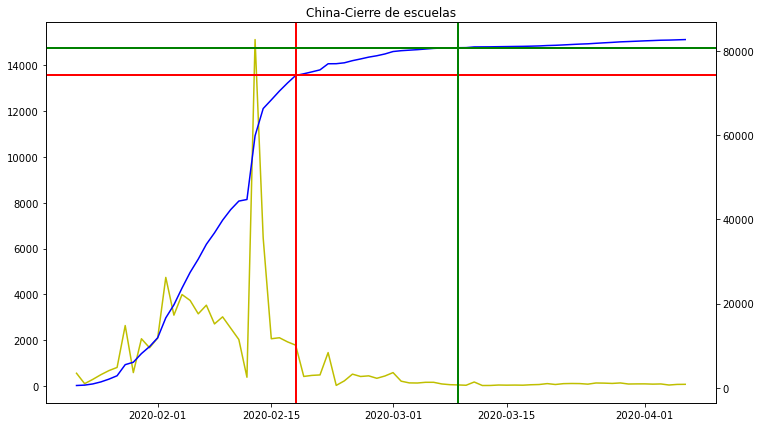

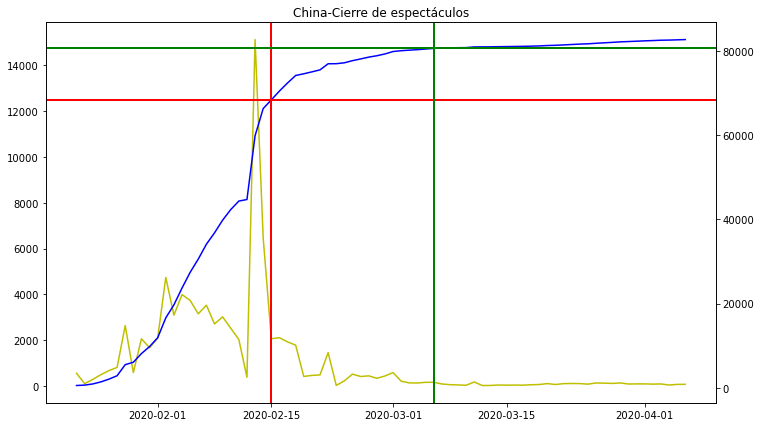

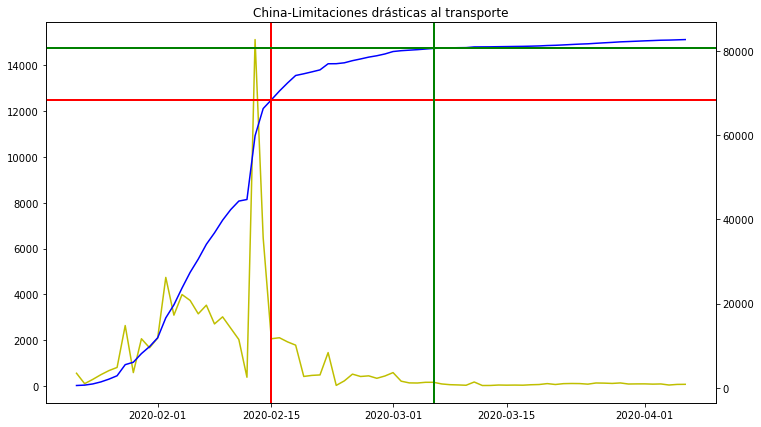

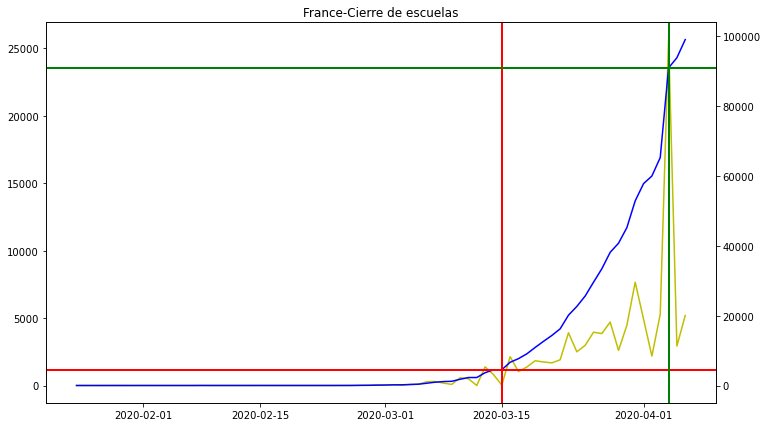

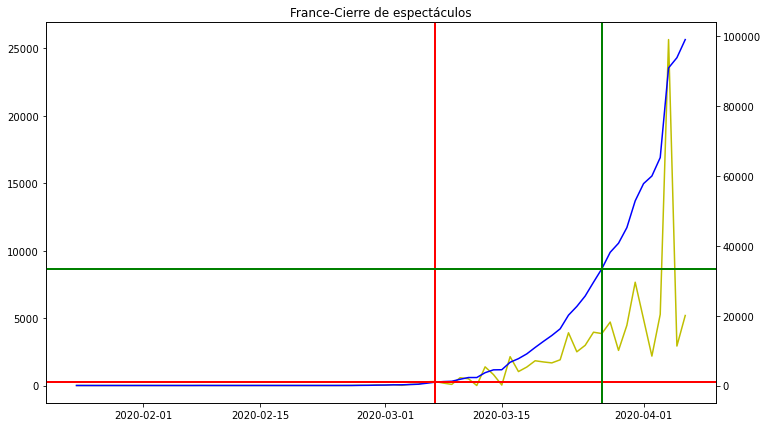

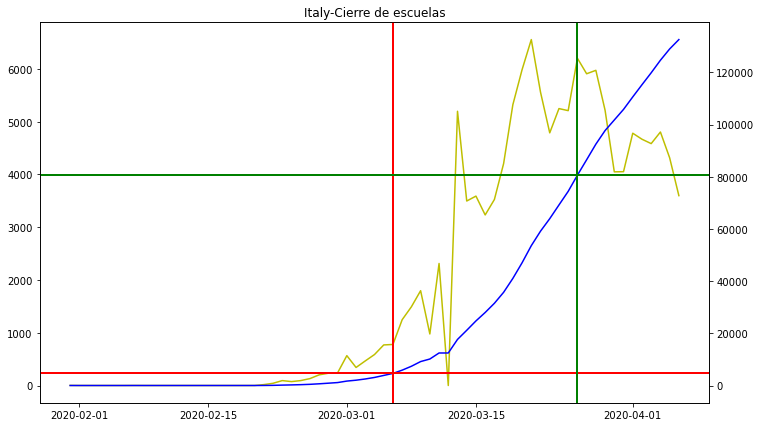

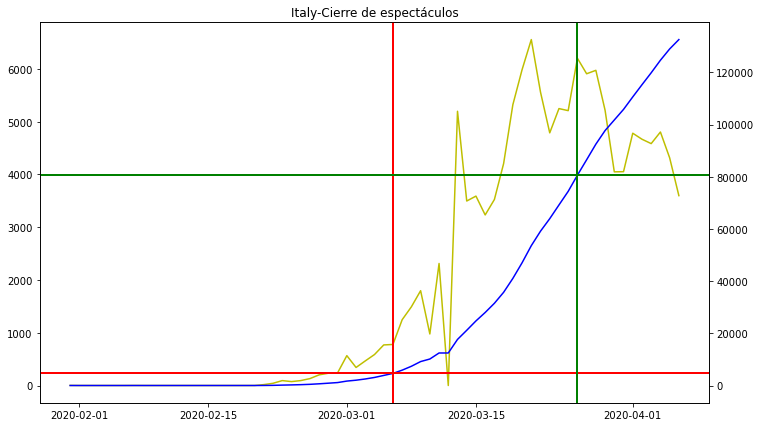

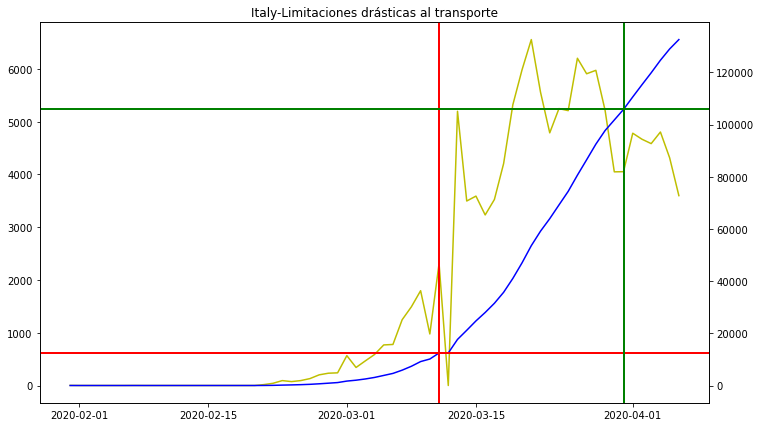

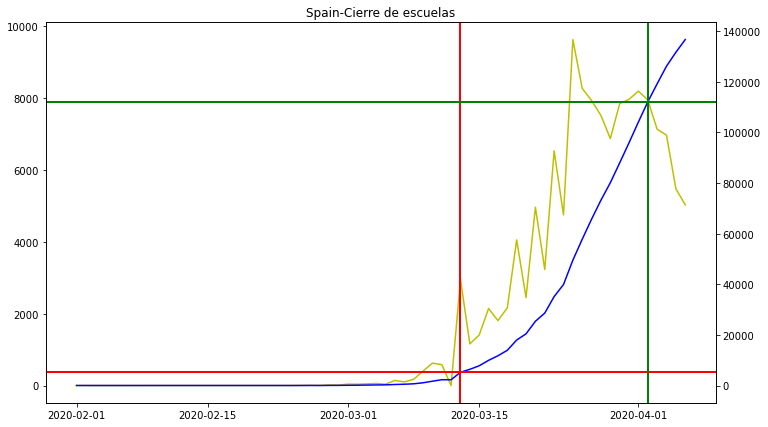

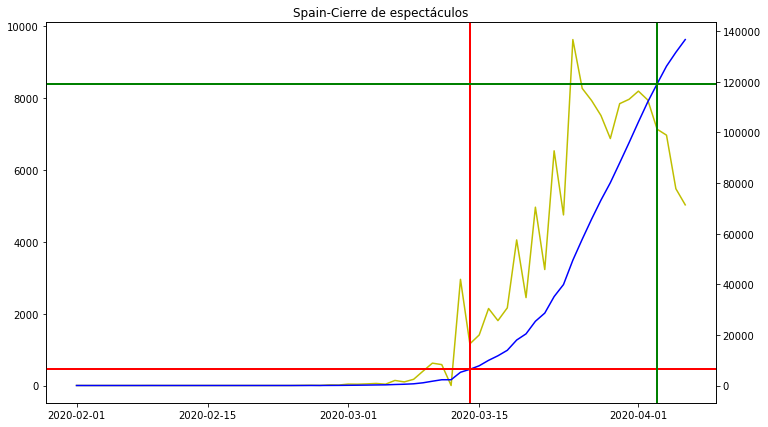

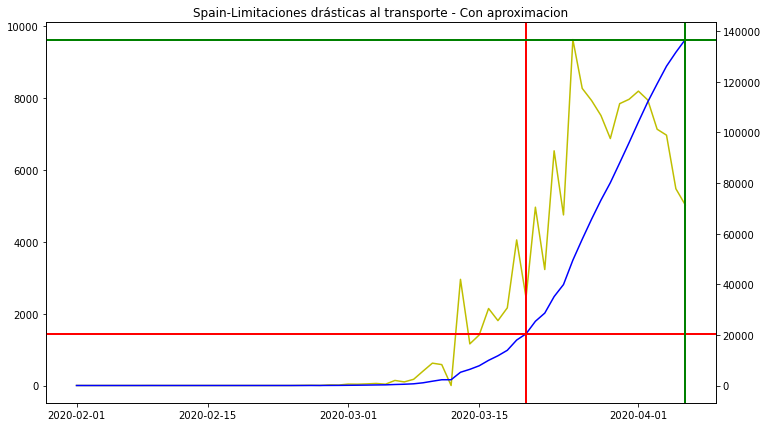

In [576]:
for country,medidas in dic.items():
    print(country)
    for measure in medidas:
        event = covid19_data_withgovm.loc[(covid19_data_withgovm.loc[:,'Government Measure']==measure)
                                          & (covid19_data_withgovm.loc[:,'CountryExp']==country),'NewConfCases_cum']
        if len(event)>0:

            fig, ax1 = plt.subplots(figsize=(12, 7))

            ax1.plot(covid19_data_withgovm.loc[covid19_data_withgovm.loc[:,'CountryExp']==country,'NewConfCases'], color='y')

            ax2 = ax1.twinx()

            ax2.plot(covid19_data_withgovm.loc[covid19_data_withgovm.loc[:,'CountryExp']==country,'NewConfCases_cum'], color='b')

            print(measure, 'en ', country,' :', event.index.values[0], 'con ', event.values[0], 'casos confirmados.')

            plt.axvline(x=event.index, linewidth=2, color='r') 
            plt.axhline(y=event.values, linewidth=2, color='r') 

            
            day1 = event.index + datetime.timedelta(days=20)
            day = day1.values[0]
            ts = (day - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
            day = datetime.datetime.utcfromtimestamp(ts)
            day = nearest(covid19_data_withgovm, day1)
            if day != day1:
                plt.axvline(x=day, linewidth=2, color='g')
                message = country + '-' + measure + ' - Con aproximacion'
            else:
                plt.axvline(x=day1, linewidth=2, color='g')
                message = country + '-' + measure
            plt.title(message)
            value = covid19_data_withgovm[covid19_data_withgovm.CountryExp == country].loc[day,"NewConfCases_cum"]
            plt.axhline(y=value, linewidth=2, color='g')


<ipython-input-577-f74a76ea3586>:17: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (day - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')


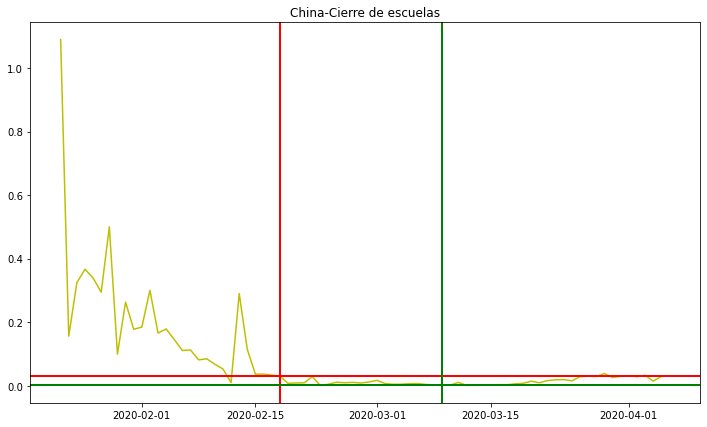

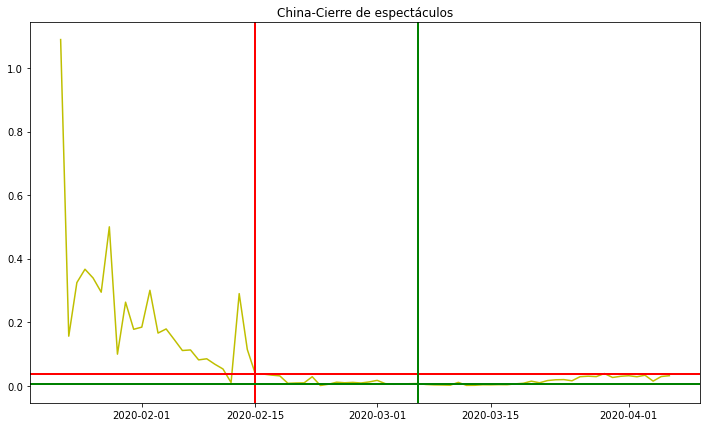

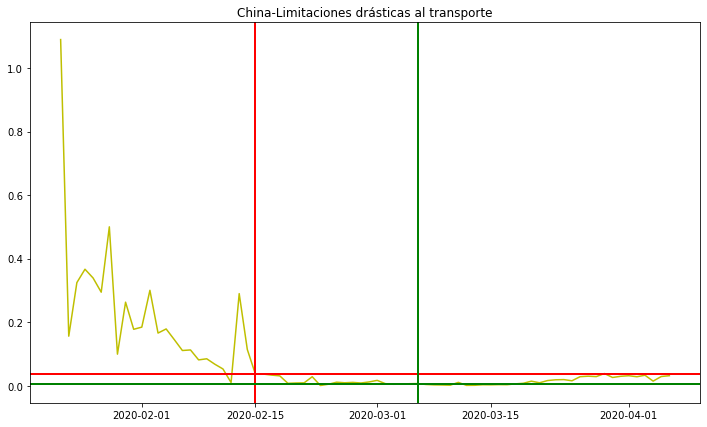

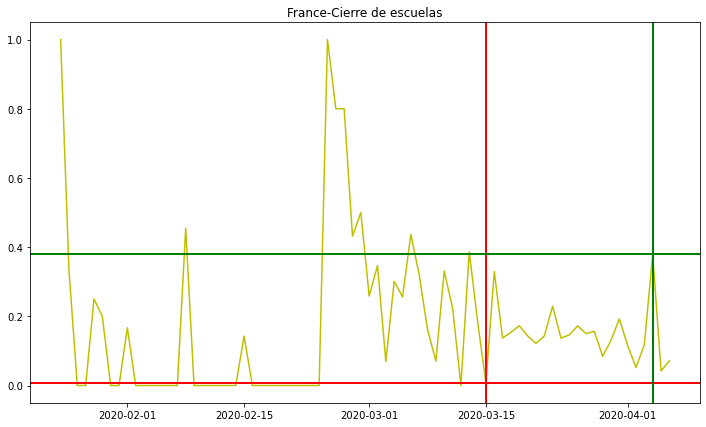

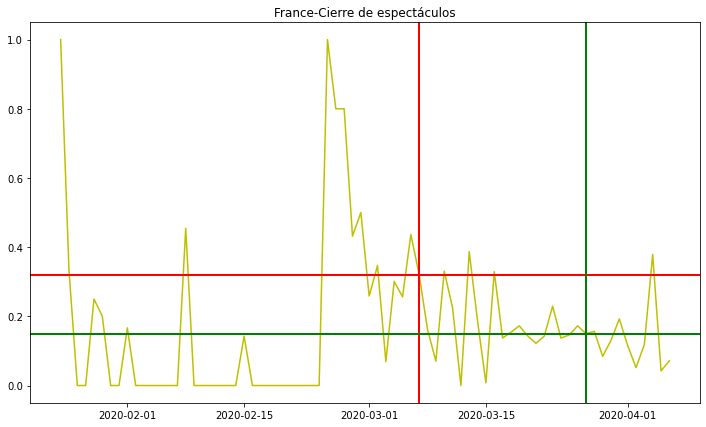

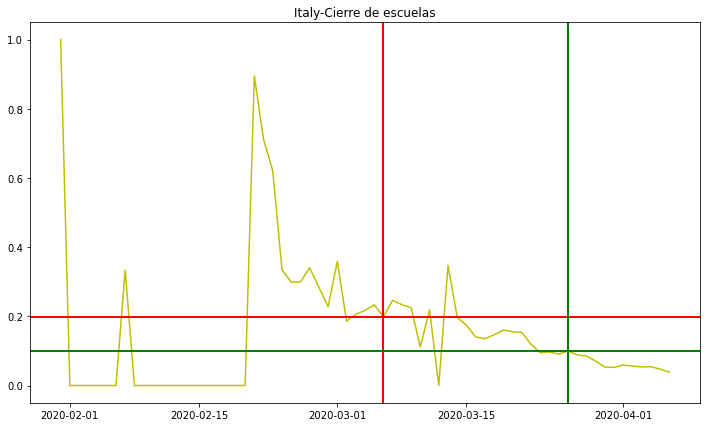

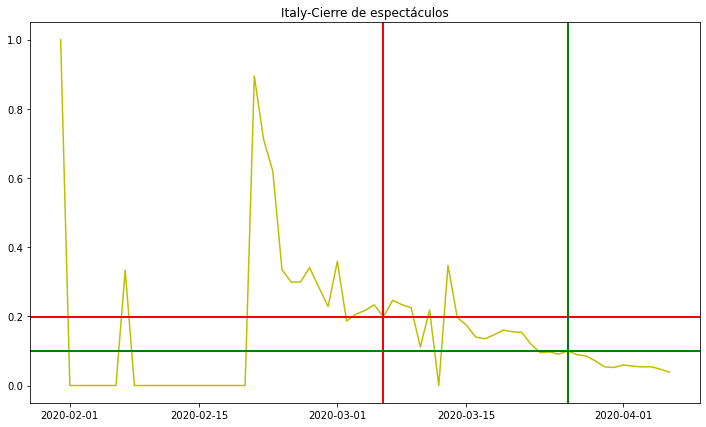

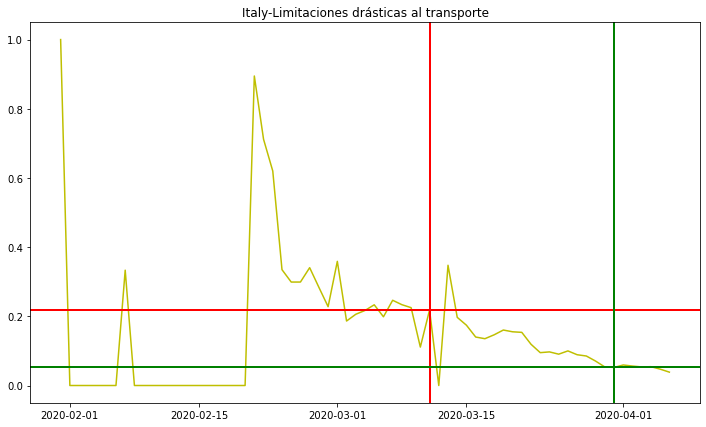

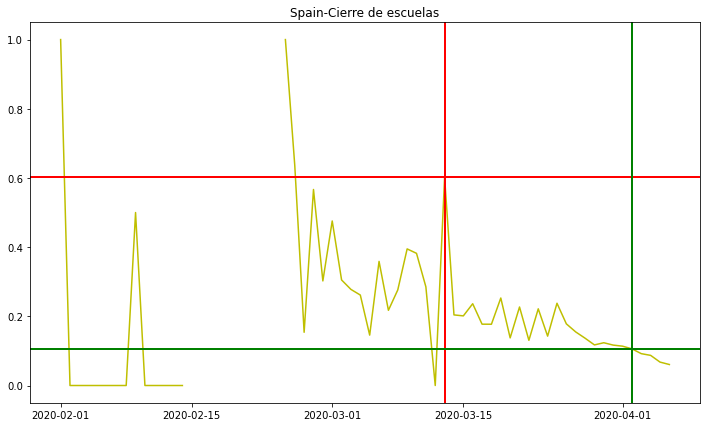

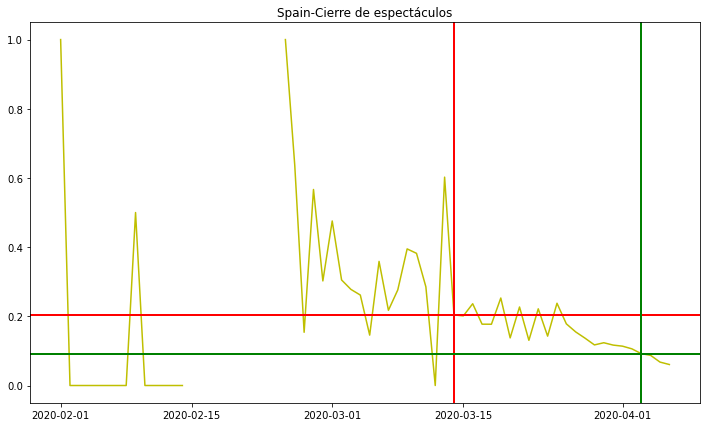

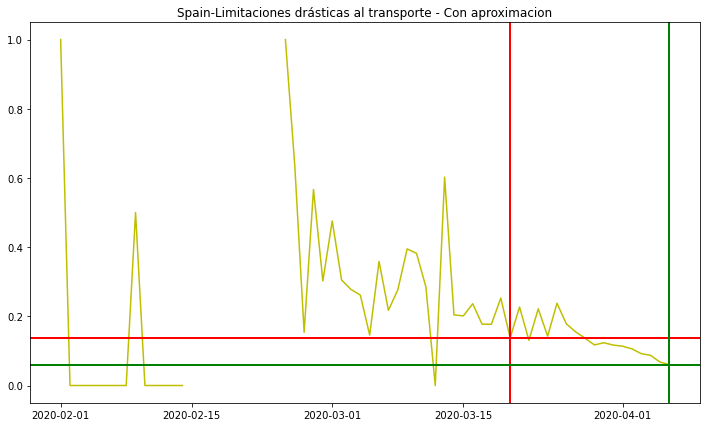

In [577]:
for country,medidas in dic.items():
    for measure in medidas:
        event = covid19_data_withgovm.loc[(covid19_data_withgovm.loc[:,'Government Measure']==measure)
                                          & (covid19_data_withgovm.loc[:,'CountryExp']==country),'Infected_per_day']
        if len(event)>0:

            fig, ax1 = plt.subplots(figsize=(12, 7))

            ax1.plot(covid19_data_withgovm.loc[covid19_data_withgovm.loc[:,'CountryExp']==country,'Infected_per_day'], color='y')

            plt.axvline(x=event.index, linewidth=2, color='r') 
            plt.axhline(y=event.values, linewidth=2, color='r') 

            
            day1 = event.index + datetime.timedelta(days=20)
            day = day1.values[0]
            ts = (day - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
            day = datetime.datetime.utcfromtimestamp(ts)
            day = nearest(covid19_data_withgovm, day1)
            if day != day1:
                plt.axvline(x=day, linewidth=2, color='g')
                message = country + '-' + measure + ' - Con aproximacion'
            else:
                plt.axvline(x=day1, linewidth=2, color='g')
                message = country + '-' + measure
            plt.title(message)
            value = covid19_data_withgovm[covid19_data_withgovm.CountryExp == country].loc[day,"Infected_per_day"]
            plt.axhline(y=value, linewidth=2, color='g')

In [578]:
covid19_data_withgovm[covid19_data_withgovm.CountryExp =="Spain"].head(50)

,level_0,index,CountryExp,NewConfCases_cum,NewDeaths_cum,NewRecovered_cum,NewConfCases,NewDeaths,NewRecovered,activos,Infected_per_day,Growth3Days,previous_growth_3d,forward_growth_3d,Government Measure,DayOfGovM,DaysFromFirst
DateRep,,,,,,,,,,,,,,,,,
2020-02-01,174,174,Spain,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.000000,NaN,NaN,NaN,NaN,NaT,NaN
2020-02-02,209,209,Spain,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,NaN,NaN,NaN,NaN,NaT,NaN
2020-02-03,216,216,Spain,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,NaN,NaN,NaN,NaN,NaT,NaN
2020-02-04,242,242,Spain,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.902970,NaN,NaT,NaN
2020-02-05,278,278,Spain,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,NaN,0.000000,NaN,NaN,NaT,NaN
2020-02-06,322,322,Spain,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,NaN,0.000000,NaN,NaN,NaT,NaN
2020-02-07,354,354,Spain,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,NaN,0.000000,NaN,Alerta Epidemiológica,2020-02-07,6.0
2020-02-08,383,383,Spain,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,NaN,0.000000,NaN,NaN,NaT,NaN
2020-02-09,384,384,Spain,2.0,0.0,0.0,1.0,0.0,0.0,2.0,0.500000,inf,0.000000,0.926123,NaN,NaT,NaN


## Determine the effect on the exponential

In [579]:
covid19_data_withgovm.head()

,level_0,index,CountryExp,NewConfCases_cum,NewDeaths_cum,NewRecovered_cum,NewConfCases,NewDeaths,NewRecovered,activos,Infected_per_day,Growth3Days,previous_growth_3d,forward_growth_3d,Government Measure,DayOfGovM,DaysFromFirst
DateRep,,,,,,,,,,,,,,,,,
2020-01-22,6,6,China,547.0,17.0,28.0,547.0,17.0,28.0,502.0,1.089641,NaN,NaN,NaN,NaN,NaT,NaN
2020-01-23,16,16,China,639.0,18.0,30.0,92.0,1.0,2.0,591.0,0.155668,NaN,NaN,NaN,NaN,NaT,NaN
2020-01-24,22,22,China,916.0,26.0,36.0,277.0,8.0,6.0,854.0,0.324356,NaN,NaN,NaN,NaN,NaT,NaN
2020-01-24,24,24,France,2.0,0.0,0.0,2.0,0.0,0.0,2.0,1.000000,NaN,NaN,NaN,NaN,NaT,NaN
2020-01-25,36,36,France,3.0,0.0,0.0,1.0,0.0,0.0,3.0,0.333333,NaN,NaN,NaN,NaN,NaT,NaN


### Compute effects of gov measures

In [580]:
covid19_data_withgovm.loc[covid19_data_withgovm.loc[:,'CountryExp']=='China',:]

,level_0,index,CountryExp,NewConfCases_cum,NewDeaths_cum,NewRecovered_cum,NewConfCases,NewDeaths,NewRecovered,activos,Infected_per_day,Growth3Days,previous_growth_3d,forward_growth_3d,Government Measure,DayOfGovM,DaysFromFirst
DateRep,,,,,,,,,,,,,,,,,
2020-01-22,6,6,China,547.0,17.0,28.0,547.0,17.0,28.0,502.0,1.089641,NaN,NaN,NaN,NaN,NaT,NaN
2020-01-23,16,16,China,639.0,18.0,30.0,92.0,1.0,2.0,591.0,0.155668,NaN,NaN,NaN,NaN,NaT,NaN
2020-01-24,22,22,China,916.0,26.0,36.0,277.0,8.0,6.0,854.0,0.324356,NaN,NaN,NaN,NaN,NaT,NaN
2020-01-25,40,40,China,1399.0,42.0,39.0,483.0,16.0,3.0,1318.0,0.366464,0.336316,0.336316,1.616059,NaN,NaT,NaN
2020-01-26,46,46,China,2062.0,56.0,49.0,663.0,14.0,10.0,1957.0,0.338784,2.176318,1.256317,1.633834,NaN,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-02,5629,5629,China,82432.0,3322.0,76565.0,71.0,6.0,160.0,2545.0,0.027898,1.089117,1.658308,0.927642,NaN,NaT,NaN
2020-04-03,5960,5960,China,82511.0,3326.0,76760.0,79.0,4.0,195.0,2425.0,0.032577,1.111651,1.650498,0.887274,Apertura de clases en algunas provincias,2020-04-03,72.0
2020-04-04,5979,5979,China,82543.0,3330.0,76946.0,32.0,4.0,186.0,2267.0,0.014116,0.454453,1.633653,0.812481,NaN,NaT,NaN


In [581]:
# Consolidate effects of government measures on growth
measures_effect = covid19_data_withgovm.loc[~covid19_data_withgovm.loc[:,'Government Measure'].isna(),['CountryExp','Government Measure','DaysFromFirst','Growth3Days','previous_growth_3d','forward_growth_3d']]
measures_effect.rename(columns={'Growth3Days':'actual_value_growth'}, inplace=True)

In [582]:
measures_effect

,CountryExp,Government Measure,DaysFromFirst,actual_value_growth,previous_growth_3d,forward_growth_3d
DateRep,,,,,,
2020-02-01,Italy,Recomendación de aislamiento,1.0,NaN,NaN,NaN
2020-02-07,Spain,Alerta Epidemiológica,6.0,NaN,0.000000,NaN
2020-02-14,China,Recomendación de aislamiento,23.0,2.171196,1.055506,1.848640
2020-02-15,China,Limitaciones drásticas al transporte,24.0,3.706218,1.175993,1.842437
2020-02-15,China,Cierre de espectáculos,24.0,3.706218,1.175993,1.842437
2020-02-18,China,Cierre de escuelas,27.0,0.855592,1.085722,1.871120
2020-02-23,Italy,Bloqueo de ciudades afectadas,23.0,inf,0.000000,0.865983
2020-02-25,China,Bloqueo de ciudades afectadas,34.0,0.383250,1.021222,2.039916
2020-03-06,Italy,Cierre de escuelas,35.0,0.964796,0.674285,0.899874


In [583]:
# Compute impact
measures_effect.loc[:,'growth_effect'] = measures_effect.loc[:,'forward_growth_3d'] / measures_effect.loc[:,'previous_growth_3d']

In [584]:
measures_effect

,CountryExp,Government Measure,DaysFromFirst,actual_value_growth,previous_growth_3d,forward_growth_3d,growth_effect
DateRep,,,,,,,
2020-02-01,Italy,Recomendación de aislamiento,1.0,NaN,NaN,NaN,NaN
2020-02-07,Spain,Alerta Epidemiológica,6.0,NaN,0.000000,NaN,NaN
2020-02-14,China,Recomendación de aislamiento,23.0,2.171196,1.055506,1.848640,1.751425
2020-02-15,China,Limitaciones drásticas al transporte,24.0,3.706218,1.175993,1.842437,1.566707
2020-02-15,China,Cierre de espectáculos,24.0,3.706218,1.175993,1.842437,1.566707
2020-02-18,China,Cierre de escuelas,27.0,0.855592,1.085722,1.871120,1.723387
2020-02-23,Italy,Bloqueo de ciudades afectadas,23.0,inf,0.000000,0.865983,inf
2020-02-25,China,Bloqueo de ciudades afectadas,34.0,0.383250,1.021222,2.039916,1.997524
2020-03-06,Italy,Cierre de escuelas,35.0,0.964796,0.674285,0.899874,1.334559


In [585]:
# European countries
european_effects = measures_effect.loc[measures_effect.loc[:,'CountryExp'].isin(['France','Italy','Spain']),:].groupby('Government Measure')['DaysFromFirst','actual_value_growth','growth_effect'].mean()
european_effects

,DaysFromFirst,actual_value_growth,growth_effect
Government Measure,,,
Alerta Epidemiológica,6.000000,NaN,NaN
Bloqueo de ciudades afectadas,23.000000,inf,inf
Cierre de escuelas,42.333333,inf,1.550962
Cierre de espectáculos,40.000000,0.913905,1.401917
Cierre de fronteras,40.000000,0.934992,1.203313
Licencias y home office,45.666667,inf,1.449245
Limitaciones drásticas al transporte,44.000000,0.855669,1.095615
Recomendación de aislamiento,26.000000,inf,2.368711
Restricciones al transporte público,46.000000,0.880217,0.998841


In [586]:
# China
china_effects = measures_effect.loc[measures_effect.loc[:,'CountryExp'].isin(['China']),:].groupby('Government Measure')['DaysFromFirst','actual_value_growth','growth_effect'].mean()
china_effects

,DaysFromFirst,actual_value_growth,growth_effect
Government Measure,,,
Apertura de clases en algunas provincias,72.0,1.111651,0.537579
Bloqueo de ciudades afectadas,34.0,0.383250,1.997524
Cierre de escuelas,27.0,0.855592,1.723387
Cierre de espectáculos,24.0,3.706218,1.566707
Limitaciones drásticas al transporte,24.0,3.706218,1.566707
Recomendación de aislamiento,23.0,2.171196,1.751425


In [587]:
df_effects = european_effects.merge(china_effects,left_index=True,right_index=True,how='outer',suffixes=('_eu', '_ch'))

df_effects.loc[:,'effect_diff'] = (df_effects.loc[:,'growth_effect_eu'] - df_effects.loc[:,'growth_effect_ch']) / df_effects.loc[:,'growth_effect_eu']

In [588]:
df_effects.head()

,DaysFromFirst_eu,actual_value_growth_eu,growth_effect_eu,DaysFromFirst_ch,actual_value_growth_ch,growth_effect_ch,effect_diff
Government Measure,,,,,,,
Alerta Epidemiológica,6.000000,NaN,NaN,NaN,NaN,NaN,NaN
Apertura de clases en algunas provincias,NaN,NaN,NaN,72.0,1.111651,0.537579,NaN
Bloqueo de ciudades afectadas,23.000000,inf,inf,34.0,0.383250,1.997524,NaN
Cierre de escuelas,42.333333,inf,1.550962,27.0,0.855592,1.723387,-0.111173
Cierre de espectáculos,40.000000,0.913905,1.401917,24.0,3.706218,1.566707,-0.117547


In [589]:
df_effects.to_csv('C:\\Users\\c.lopez.de.munain\\Documents\\covid_19\\data\\govmeasures_effect.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\c.lopez.de.munain\\Documents\\covid_19\\data\\govmeasures_effect.csv'

In [ ]:
df_effects.round(2).dropna()